In [1]:
#Import This
import tensorflow as tf
import string
import time
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from tensorflow import keras
from collections import Counter
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model, model_from_json

In [2]:
print(tf.__version__)

2.8.0


In [3]:
#Read the CSV
alphacsv = pd.read_csv("Dataset/airo_train.csv")

In [4]:
alphacsv.shape

(1200, 2)

In [5]:
alphacsv.head()

,text,is_gaming
0,cari pc buat edit video,1
1,cari pc untuk render 3d,1
2,cari pc buat 3d rendering,1
3,cari pc buat autocad,1
4,mencari pc yang bisa rata kanan,1


In [6]:
#Show the Quantities of Data per Category
print((alphacsv.is_gaming == 1).sum())
print((alphacsv.is_gaming == 0).sum())

550
650


In [7]:
#Unused Words (Not Specific)
unused =  {'saya',
 'mau',
 'ingin',
 'aku',
 'suka',
 'beli',
 'sangat',
 'menginginkan',
 'cari',
 'pc',
 'komputer',
 'untuk',
 'jadi',
 'mencari',
 'membuat',
 'membutuhkan',
 'butuh',
 'find',
 'search',
 'i',
 'want',
 'need',
 'buy',
 'computers',
 'computer',
 'melakukan',
 'do',
 'looking',
 'again',
 'digunakan',
 'to',
 'a',
 'my',
 'mirip',
 'yang',
 'digunakan',
 'menggunakan',
 'menggunakan',
 'buat',
 'adalah',
 'bisa',
 'for',
 'can',
 'dapat',
 'by',
 'by',
 'create',
 'pembuatan',
 'at',
 'di',
 'mengerjakan',
 'membutuhhkan',
 'mendambakan',
 'memberikan',
 'membantu',
 'rekomendasi',
 'isnt',          
 'are',
 'is',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'same',
 'shan',
 "shan't",
 'she',
 "she's",
 'should',
 "should've",
 'shouldn',
 "shouldn't",
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 "that'll",
 'the',
 'their',
 'theirs',
 'them',
 'themselves',
 'then',
 'there',
 'these',
 'they',
 'this',
 'those',
 'through',
 'to',
 'too',
 'under',
 'until',
 'up',
 've',
 'very',
 'was',
 'wasn',
 "wasn't",
 'we',
 'were',
 'weren',
 "weren't",
 'what',
 'when',
 'where',
 'which',
 'while',
 'who',
 'whom',
 'why',
 'will',
 'with',
 'won',
 "won't",
 'wouldn',
 "wouldn't",
 'y',
 'you',
 "you'd",
 "you'll",
 "you're",
 "you've",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'on',
 'dan',
 'dan',
 'e',
 'u',
 'o',
 'nya',
 'ini',
 'sama',
 'dengan',
 'sambil',
 'dibuat'
}

In [8]:
#To Count the Words inside airo_train.csv File
def jumlah_kata(column):
    kata = Counter()
    for text in column.values:
        for word in text.split():
            kata[word] += 1
    return kata

#To Delete the Unused Words for the Training (Not Specific Enough)
def kata_unused(column):
    filtered = [kata.lower() for kata in column.split() if kata.lower() not in unused]
    return " ".join(filtered)

#To Delete the Punctuation
def tanda_baca(text):
    delta = str.maketrans("", "", string.punctuation)
    return text.translate(delta)

In [9]:
alphacsv["text"] = alphacsv.text.map(tanda_baca)

In [10]:
alphacsv["text"] = alphacsv.text.map(kata_unused)

In [11]:
totalkata = jumlah_kata(alphacsv.text)

In [12]:
alphacsv.text

0                         edit video
1                          render 3d
2                       3d rendering
3                            autocad
4                         rata kanan
                    ...             
1195    content creator sering video
1196        aplikasi premiere effect
1197       mama laptop video wedding
1198                    kuat editing
1199          bermain jangka panjang
Name: text, Length: 1200, dtype: object

In [13]:
#Print Total Words and How Many Times they're Used
print(len(totalkata))
totalkata

885


Counter({'edit': 10,
         'video': 31,
         'render': 5,
         '3d': 12,
         'rendering': 5,
         'autocad': 3,
         'rata': 9,
         'kanan': 9,
         'nyari': 5,
         'game': 47,
         'aaa': 4,
         'main': 22,
         'berat': 5,
         'desain': 16,
         'rumah': 2,
         'gedung': 2,
         'elden': 8,
         'ring': 8,
         'tomb': 4,
         'raider': 4,
         'kencang': 7,
         'lag': 18,
         'gahar': 8,
         'banget': 3,
         'full': 7,
         'speed': 6,
         'lelet': 4,
         'paket': 1,
         'lengkap': 1,
         'dota': 11,
         'grafik': 1,
         'pro': 11,
         'gamer': 5,
         'akut': 1,
         'esport': 8,
         'sport': 9,
         'atlet': 3,
         'kaya': 1,
         'valorant': 7,
         'chocotaco': 3,
         'anti': 6,
         'olahraga': 1,
         'kerja': 11,
         'kuliah': 10,
         'sekolah': 19,
         'office': 22,
         '

In [14]:
#3 Most Used Words in the Dataset
totalkata.most_common(3)

[('game', 47), ('play', 44), ('video', 31)]

In [15]:
#Split the Dataset (80% for Training and 20% for Validation)
size = int(alphacsv.shape[0] * 0.8)

training = alphacsv[:size]
validating = alphacsv[size:]

train_text = training.text.to_numpy()
train_label = training.is_gaming.to_numpy()
val_text = validating.text.to_numpy()
val_label = validating.is_gaming.to_numpy()

In [16]:
train_text.shape, train_label.shape, val_text.shape, val_label.shape

((960,), (960,), (240,), (240,))

In [17]:
#Create Hyper Parameter
oovtoken = "<OOV>"
num = 1000
maxl = 20
padding = "post"
trunc = "post"
embed = 32

In [18]:
#Create the Tokenizer and Word Index
tokenizer = Tokenizer(num_words=num, oov_token=oovtoken)
tokenizer.fit_on_texts(train_text)
index = tokenizer.word_index

In [19]:
#The Word Index from the Dataset
index

{'<OOV>': 1,
 'game': 2,
 'bermain': 3,
 'low': 4,
 'video': 5,
 'main': 6,
 'budget': 7,
 'play': 8,
 'sekolah': 9,
 'belajar': 10,
 'office': 11,
 'murah': 12,
 'streaming': 13,
 'lag': 14,
 'sebagai': 15,
 'desain': 16,
 'microsoft': 17,
 'sering': 18,
 'anak': 19,
 'youtube': 20,
 'gaming': 21,
 'online': 22,
 'support': 23,
 'kegiatan': 24,
 'design': 25,
 'spek': 26,
 'bekerja': 27,
 '3d': 28,
 'harga': 29,
 'games': 30,
 'menulis': 31,
 'work': 32,
 'kerja': 33,
 'internet': 34,
 'aplikasi': 35,
 'coding': 36,
 'data': 37,
 'tugas': 38,
 'atau': 39,
 'kuliah': 40,
 'biasa': 41,
 'excel': 42,
 'kuat': 43,
 'lagi': 44,
 'dalam': 45,
 'cheap': 46,
 'rata': 47,
 'kanan': 48,
 'dota': 49,
 'pro': 50,
 'sport': 51,
 'hari': 52,
 'pelajar': 53,
 'bagus': 54,
 'word': 55,
 'potato': 56,
 'nonton': 57,
 'project': 58,
 'tinggi': 59,
 'perusahaan': 60,
 'school': 61,
 'edit': 62,
 'gahar': 63,
 'esport': 64,
 'sehari': 65,
 'laporan': 66,
 'lama': 67,
 'adobe': 68,
 'software': 69,
 'meno

In [20]:
#Create Sequences from the Text
train_sequence = tokenizer.texts_to_sequences(train_text)
val_sequence = tokenizer.texts_to_sequences(val_text)

In [21]:
#Create Padded Sequences
train_pad = pad_sequences(train_sequence, maxlen=maxl, padding=padding, truncating=trunc)
val_pad = pad_sequences(val_sequence, maxlen=maxl, padding=padding, truncating=trunc)

In [22]:
train_pad.shape, val_pad.shape

((960, 20), (240, 20))

In [23]:
train_text[10], train_sequence[10], train_pad[10]

('main game tomb raider',
 [6, 2, 146, 147],
 array([  6,   2, 146, 147,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0]))

In [24]:
#Create the Model Layers
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(num, embed, input_length=maxl),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 32)            32000     
                                                                 
 global_average_pooling1d (G  (None, 32)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 33,089
Trainable params: 33,089
Non-trainable params: 0
_________________________________________________________________


In [26]:
#Compile the Model
loss = keras.losses.BinaryCrossentropy(from_logits=False)
optimizer = keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]
epoch = 30

model.compile(loss=loss,optimizer=optimizer,metrics=metrics)

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [27]:
#Train the Model
history = model.fit(train_pad, train_label, epochs=epoch, validation_data=(val_pad, val_label), verbose=2)

Epoch 1/30
30/30 - 1s - loss: 0.6924 - accuracy: 0.5188 - val_loss: 0.6862 - val_accuracy: 0.6083 - 518ms/epoch - 17ms/step
Epoch 2/30
30/30 - 0s - loss: 0.6901 - accuracy: 0.5250 - val_loss: 0.6837 - val_accuracy: 0.6083 - 66ms/epoch - 2ms/step
Epoch 3/30
30/30 - 0s - loss: 0.6872 - accuracy: 0.5250 - val_loss: 0.6759 - val_accuracy: 0.6083 - 64ms/epoch - 2ms/step
Epoch 4/30
30/30 - 0s - loss: 0.6818 - accuracy: 0.5250 - val_loss: 0.6680 - val_accuracy: 0.6083 - 61ms/epoch - 2ms/step
Epoch 5/30
30/30 - 0s - loss: 0.6702 - accuracy: 0.5542 - val_loss: 0.6559 - val_accuracy: 0.6958 - 71ms/epoch - 2ms/step
Epoch 6/30
30/30 - 0s - loss: 0.6439 - accuracy: 0.7010 - val_loss: 0.6300 - val_accuracy: 0.9250 - 54ms/epoch - 2ms/step
Epoch 7/30
30/30 - 0s - loss: 0.5968 - accuracy: 0.8385 - val_loss: 0.5942 - val_accuracy: 0.8792 - 64ms/epoch - 2ms/step
Epoch 8/30
30/30 - 0s - loss: 0.5284 - accuracy: 0.9219 - val_loss: 0.5372 - val_accuracy: 0.8667 - 56ms/epoch - 2ms/step
Epoch 9/30
30/30 - 0s 

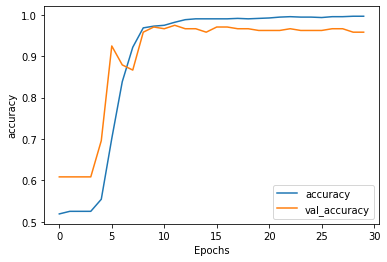

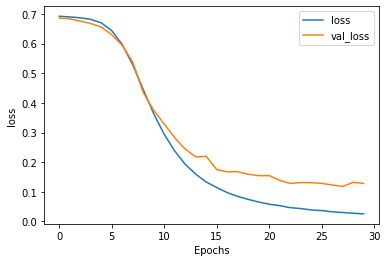

In [28]:
#Visualize the Training, Watch the Graph
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [29]:
#Test the model with training dataset (Optional)
predictions = model.predict(train_pad)
predictions = [1 if zigma > 0.5 else 0 for zigma in predictions]

In [30]:
print(train_text[523])

print(train_label[523])

print(predictions[523])

pemain proffesional valorant
1
1


In [31]:
#Evaluate the model (Optional)
model.evaluate(val_pad, val_label)

8/8 [==============================] - 0s 1ms/step - loss: 0.1283 - accuracy: 0.9583


[0.1282849907875061, 0.9583333134651184]

In [32]:
#Save the model.pb, variables, assets, keras_metadata.pb
model.save('airo_one')

INFO:tensorflow:Assets written to: airo_one\assets


In [33]:
#Convert the model to json and save the weights into HDF5 format
model2 = model.to_json()
with open('model.json','w') as file:
    file.write(model2)
model.save_weights('model.h5')

In [34]:
#Load the model.json and the weight (.h5)
json = open('model.json','r')
load = json.read()
json.close()

loaded = model_from_json(load)
loaded.load_weights('model.h5')

In [35]:
#You can input or type any comment about how you will use your PC (Work, Gaming, Study, etc.)
user_input = 'aku mau pc yang bisa dibuat main game pokemon sama belajar'

In [36]:
user_input = tanda_baca(user_input)

In [37]:
user_input = kata_unused(user_input)

In [38]:
print(user_input)

main game pokemon belajar


In [39]:
user_input = user_input.split(" ")

In [40]:
x_sequence = tokenizer.texts_to_sequences(user_input)

In [41]:
x_pad = pad_sequences(x_sequence, maxlen=maxl, padding=padding, truncating=trunc)

In [42]:
x_pred = loaded.predict(x_pad)

In [43]:
x_pred

array([[0.93108976],
       [0.9946672 ],
       [0.42196867],
       [0.00757489]], dtype=float32)

In [44]:
# This variable shows the average score of the prediction
result = sum(x_pred)/len(x_pred)

In [45]:
# We chose 51% as the bare minimum that determine between the needed pc components category (Gaming or Non-Gaming)
label = "Gaming" if result > 0.51 else "Non-Gaming"

In [46]:
print(label)

Gaming


In [47]:
#Yeah..... It's done. 